In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('outlier_removed.csv')

In [4]:
df

,index,BHK,sector,price,price_persqft,SuperArea,floor,Furnishing,facing,Car_Parking,Bathroom,Balcony,overlooking,city
0,0.0,3,Panathur,2.25,13966.0,1611.0,10+,Unfurnished,East,available,2,1,Garden/Park,Bangalore
1,1.0,3,Panathur,2.13,12909.0,1650.0,10+,Unfurnished,East,available,3,2,Garden/Park,Bangalore
2,2.0,3,Thanisandra,1.37,9648.0,1420.0,8,Unfurnished,North - East,available,2,1,"Garden/Park, Pool",Bangalore
3,3.0,3,Panathur,1.62,11000.0,1473.0,5,Unfurnished,North - East,available,2,1,"Garden/Park, Main Road",Bangalore
4,4.0,4,Whitefield,3.93,15023.0,2616.0,10+,Unfurnished,East,available,3,2,Garden/Park,Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7435,1495.0,1,Andheri,0.85,19814.0,429.0,1,Semi-Furnished,East,not sure,1,1,Main Road,Mumbai
7436,1496.0,1,Andheri,1.29,29655.0,435.0,10+,Unfurnished,East,available,2,1,Main Road,Mumbai
7437,1497.0,2,others,2.75,25114.0,1095.0,10+,Unfurnished,East,not sure,2,1,Main Road,Mumbai
7438,1498.0,4,Andheri,4.15,31923.0,1300.0,8,Semi-Furnished,East,not sure,2,1,"Garden/Park, Main Road",Mumbai


In [5]:
test = df.copy()

In [6]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [7]:
col = test.select_dtypes(include='object').columns.tolist()

In [8]:
for i in col:
    test[i] = encoder.fit_transform(test[i])

In [9]:
test.drop(columns=['index'],inplace = True)

In [10]:
test.corr()

,BHK,sector,price,price_persqft,SuperArea,floor,Furnishing,facing,Car_Parking,Bathroom,Balcony,overlooking,city
BHK,1.000000,0.024719,0.501888,0.106183,0.709686,0.029762,-0.042864,0.051383,-0.214038,0.790937,0.172740,-0.067105,-0.275175
sector,0.024719,1.000000,-0.058470,-0.130430,0.022437,-0.006524,-0.096355,0.005117,0.009770,0.010751,0.067299,0.042386,-0.141319
price,0.501888,-0.058470,1.000000,0.695638,0.574441,0.014406,-0.015320,0.047960,-0.204413,0.538293,0.060520,-0.115496,-0.070467
price_persqft,0.106183,-0.130430,0.695638,1.000000,0.050346,0.023400,0.003414,0.019558,-0.104187,0.188049,-0.125302,-0.086638,0.128607
SuperArea,0.709686,0.022437,0.574441,0.050346,1.000000,0.036801,-0.044347,0.055938,-0.208938,0.718159,0.193574,-0.084206,-0.307824
floor,0.029762,-0.006524,0.014406,0.023400,0.036801,1.000000,-0.020627,0.018192,-0.061430,0.036204,-0.077856,-0.080369,-0.126573
Furnishing,-0.042864,-0.096355,-0.015320,0.003414,-0.044347,-0.020627,1.000000,-0.023630,0.047760,-0.052271,-0.071620,-0.018010,0.036736
facing,0.051383,0.005117,0.047960,0.019558,0.055938,0.018192,-0.023630,1.000000,-0.066705,0.062970,0.041079,-0.148669,0.051921
Car_Parking,-0.214038,0.009770,-0.204413,-0.104187,-0.208938,-0.061430,0.047760,-0.066705,1.000000,-0.236796,-0.075664,0.260551,0.192606
Bathroom,0.790937,0.010751,0.538293,0.188049,0.718159,0.036204,-0.052271,0.062970,-0.236796,1.000000,0.199742,-0.094790,-0.249697


<Axes: >

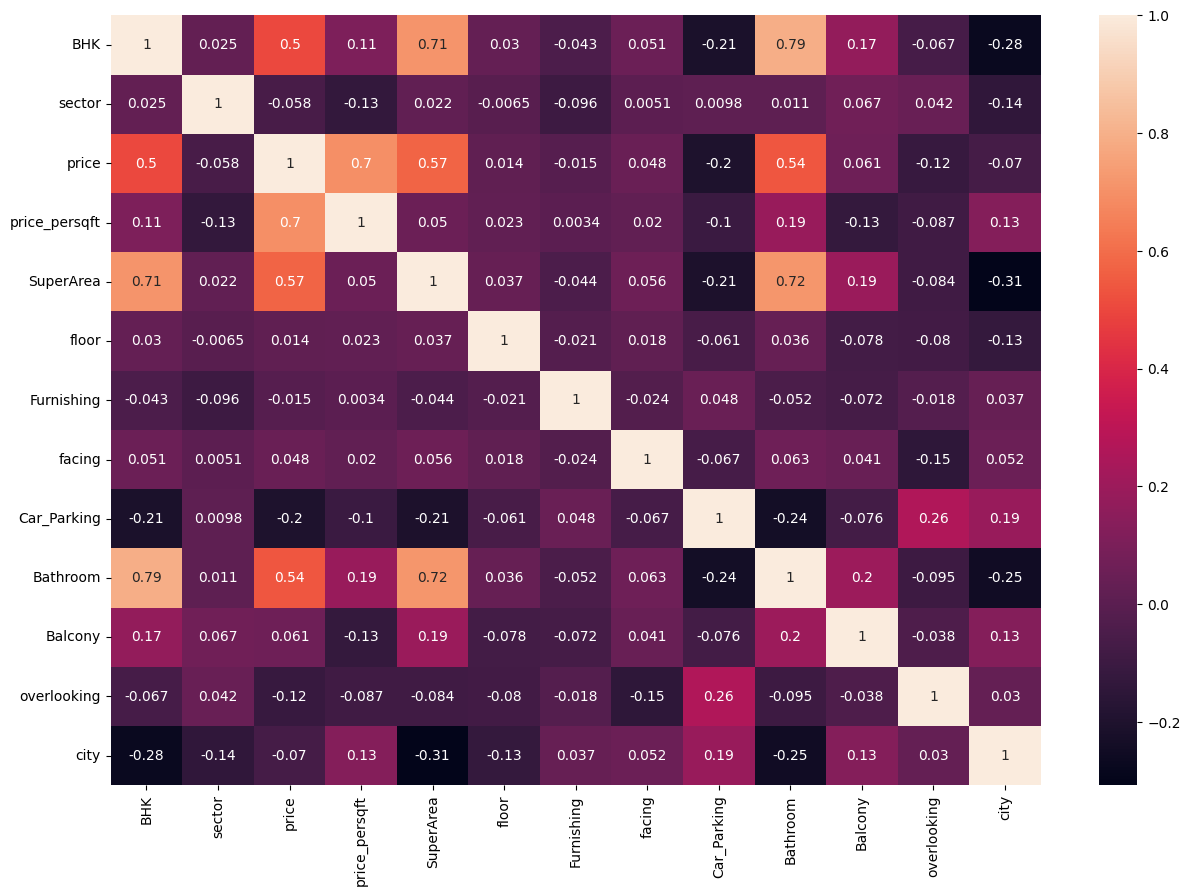

In [11]:
plt.figure(figsize=(15,10))
sns.heatmap(test.corr(),annot=True)

In [12]:
test.corr()['price'].iloc[0:].to_frame().reset_index().rename(columns={'index':'feature','price':'corr_coeff'})

,feature,corr_coeff
0,BHK,0.501888
1,sector,-0.058470
2,price,1.000000
3,price_persqft,0.695638
4,SuperArea,0.574441
5,floor,0.014406
6,Furnishing,-0.015320
7,facing,0.047960
8,Car_Parking,-0.204413
9,Bathroom,0.538293


# **random forest regressor**

In [13]:
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor(n_estimators=100,random_state=42)
RFR.fit(test.drop(columns=['price']),test['price'])

rfr_feature =   pd.DataFrame({
      'feature': test.drop(columns=['price']).columns,
      'rf_importance': RFR.feature_importances_
  }).sort_values(by='rf_importance', ascending=False)
rfr_feature

,feature,rf_importance
2,price_persqft,0.524904
3,SuperArea,0.416339
0,BHK,0.036663
8,Bathroom,0.011043
1,sector,0.002074
11,city,0.002062
4,floor,0.001850
9,Balcony,0.001368
6,facing,0.001104
5,Furnishing,0.001076


In [14]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(test.drop(columns=['price']),test['price'])

gbr_feature =   pd.DataFrame({
      'feature': test.drop(columns=['price']).columns,
      'gbr_importance': gbr.feature_importances_
  }).sort_values(by='gbr_importance', ascending=False)

gbr_feature

,feature,gbr_importance
2,price_persqft,5.043366e-01
3,SuperArea,4.392567e-01
0,BHK,5.103151e-02
11,city,1.441406e-03
10,overlooking,1.207577e-03
8,Bathroom,1.156859e-03
7,Car_Parking,6.958799e-04
1,sector,4.261289e-04
4,floor,2.124635e-04
9,Balcony,1.698214e-04


In [15]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(test.drop(columns=['price']),test['price'],test_size=0.2,random_state=42)

rfr_p = RandomForestRegressor(n_estimators=100, random_state=42)
rfr_p.fit(x_train, y_train)

# Calculate Permutation Importance
perm_importance = permutation_importance(rfr_p, x_test, y_test, n_repeats=30, random_state=42)

# Organize results into a DataFrame
rfr_permutation = pd.DataFrame({
    'feature': test.drop(columns=['price']).columns,
    'permutation_importance': perm_importance.importances_mean
}).sort_values(by='permutation_importance', ascending=False)

rfr_permutation

,feature,permutation_importance
2,price_persqft,1.017004
3,SuperArea,0.627133
0,BHK,0.081265
8,Bathroom,0.011689
9,Balcony,0.001528
11,city,0.001106
10,overlooking,0.000368
5,Furnishing,-0.000023
7,Car_Parking,-0.000034
1,sector,-0.000265


In [16]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(test.drop(columns=['price']))

lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_scaled, test['price'])

lasso = pd.DataFrame({
    'feature': test.drop(columns=['price']).columns,
    'lasso_coeff': lasso.coef_
}).sort_values(by='lasso_coeff', ascending=False)

lasso

,feature,lasso_coeff
2,price_persqft,1.638256
3,SuperArea,1.156539
0,BHK,0.224285
9,Balcony,0.073571
1,sector,0.027136
11,city,0.018630
5,Furnishing,0.015135
6,facing,0.000000
8,Bathroom,0.000000
10,overlooking,-0.014631


In [17]:
from sklearn.feature_selection import RFE

# Initialize the base estimator
estimator = RandomForestRegressor()

# Apply RFE on the label-encoded and standardized training data
selector_label = RFE(estimator, n_features_to_select=test.drop(columns=['price']).shape[1], step=1)
selector_label = selector_label.fit(test.drop(columns=['price']), test['price'])

# Get the selected features based on RFE
selected_features = test.drop(columns=['price']).columns[selector_label.support_]

# Extract the coefficients for the selected features from the underlying linear regression model
selected_coefficients = selector_label.estimator_.feature_importances_

# Organize the results into a DataFrame
fi_df6 = pd.DataFrame({
    'feature': selected_features,
    'rfe_score': selected_coefficients
}).sort_values(by='rfe_score', ascending=False)

fi_df6

,feature,rfe_score
2,price_persqft,0.518681
3,SuperArea,0.426245
0,BHK,0.032295
8,Bathroom,0.010232
1,sector,0.002351
11,city,0.002027
4,floor,0.001906
9,Balcony,0.001811
5,Furnishing,0.001434
6,facing,0.001198


In [58]:
from sklearn.linear_model import LinearRegression

X_label = test.drop(columns=['price'])
y_label = test['price']
lin_reg = LinearRegression()
lin_reg.fit(X_scaled, y_label)

# Extract coefficients
lr = pd.DataFrame({
    'feature': X_label.columns,
    'reg_coeffs': lin_reg.coef_
}).sort_values(by='reg_coeffs', ascending=False)

lr

,feature,reg_coeffs
2,price_persqft,1.650667
3,SuperArea,1.174025
0,BHK,0.246591
9,Balcony,0.080864
1,sector,0.041012
11,city,0.031893
5,Furnishing,0.026615
6,facing,0.000347
10,overlooking,-0.022461
8,Bathroom,-0.032478


In [35]:
final = rfr_feature.merge(gbr_feature).merge(rfr_permutation).merge(lasso).merge(fi_df6).merge(lr).set_index('feature')

In [36]:
final

,rf_importance,gbr_importance,permutation_importance,lasso_coeff,rfe_score,reg_coeffs
feature,,,,,,
price_persqft,0.524904,5.043366e-01,1.017004,1.638256,0.518681,1.650667
SuperArea,0.416339,4.392567e-01,0.627133,1.156539,0.426245,1.174025
BHK,0.036663,5.103151e-02,0.081265,0.224285,0.032295,0.246591
Bathroom,0.011043,1.156859e-03,0.011689,0.000000,0.010232,-0.032478
sector,0.002074,4.261289e-04,-0.000265,0.027136,0.002351,0.041012
city,0.002062,1.441406e-03,0.001106,0.018630,0.002027,0.031893
floor,0.001850,2.124635e-04,-0.000523,-0.036542,0.001906,-0.045587
Balcony,0.001368,1.698214e-04,0.001528,0.073571,0.001811,0.080864
facing,0.001104,6.454301e-05,-0.000318,0.000000,0.001198,0.000347


In [37]:
final = final.divide(final.sum(axis=0), axis=1)

In [38]:
col = final.columns.tolist()

In [39]:
final[col].mean(axis= 1).sort_values(ascending = False)

,0
feature,
price_persqft,0.532936
SuperArea,0.399505
BHK,0.053189
Balcony,0.009036
sector,0.004456
city,0.003749
Bathroom,0.003118
Furnishing,0.002665
facing,0.000383


In [40]:
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label, y_label, cv=5, scoring='r2')

In [49]:
scores.mean()

0.8834210707146248

**I droped price_persqft**

In [52]:
X_label.drop(columns='price_persqft',inplace=True)

In [54]:
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=150, random_state=42)

scores = cross_val_score(rf, X_label, y_label, cv=8, scoring='r2')
scores.mean()

0.48871012401910274

In [59]:
rf = RandomForestRegressor(n_estimators=200, random_state=42)

scores = cross_val_score(rf, X_label, y_label, cv=20, scoring='r2')
scores.mean()

0.9235385109708968